Customer Segment Analysis:
                          mean  count
SpendingClass                        
Low (0-10k)        6811.073837  56029
Medium (10k-20k)  14251.037100  60971
High (20k+)       26051.938033  17590


C:\Users\KUNAL MANDAL\AppData\Local\Temp\ipykernel_19372\3845285065.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


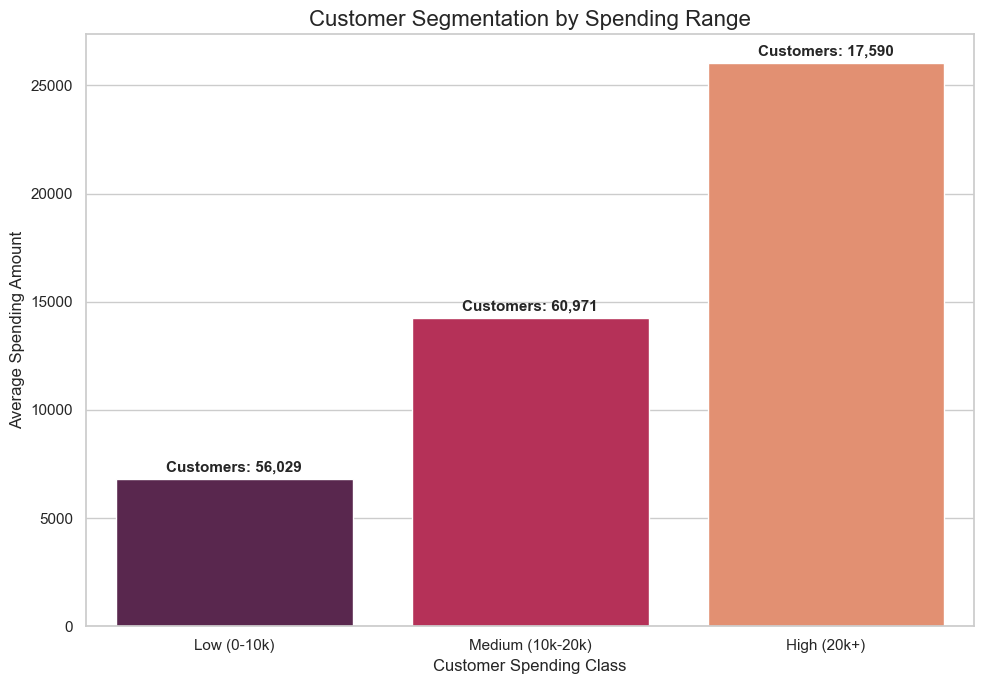

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('fact_bookings.csv')

# Define a function to create spending classes
def get_spending_class(revenue):
    if revenue <= 10000:
        return 'Low (0-10k)'
    elif 10001 <= revenue <= 20000:
        return 'Medium (10k-20k)'
    else:
        return 'High (20k+)'

# Apply the function to create a new 'SpendingClass' column
df['SpendingClass'] = df['revenue_realized'].apply(get_spending_class)

# Group by the new class and calculate metrics
# We get the average spending ('mean') and the number of customers ('count')
segment_analysis = df.groupby('SpendingClass')['revenue_realized'].agg(['mean', 'count'])

# Sort the index for a logical plot order
segment_order = ['Low (0-10k)', 'Medium (10k-20k)', 'High (20k+)']
segment_analysis = segment_analysis.reindex(segment_order)

print("Customer Segment Analysis:")
print(segment_analysis)


# --- Create the plot ---
plt.figure(figsize=(10, 7))

# Create the bar plot with average spending on the Y-axis
ax = sns.barplot(
    x=segment_analysis.index,
    y=segment_analysis['mean'],
    palette='rocket'
)

# Set titles and labels
ax.set_title('Customer Segmentation by Spending Range', fontsize=16)
ax.set_ylabel('Average Spending Amount', fontsize=12)
ax.set_xlabel('Customer Spending Class', fontsize=12)

# Add data labels for the *number of customers* on each bar
for index, row in enumerate(segment_analysis.itertuples()):
    # row[0] is index, row[1] is mean, row[2] is count
    ax.text(
        index,
        row.mean + 200, # Position label slightly above the bar
        f'Customers: {row.count:,}', # Format count with a comma
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

# Save the figure
plt.tight_layout()
plt.savefig('customer_segmentation_spending_range.png')